<a href="https://colab.research.google.com/github/Zoeyyy14/C117project/blob/main/C117challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded=files.upload()

Saving Banknote.csv to Banknote.csv


In [2]:
import pandas as pd
df=pd.read_csv("Banknote.csv")
print(df.head(10))

   variance  skewness  curtosis  entropy  class
0   3.62160    8.6661  -2.80730 -0.44699      0
1   4.54590    8.1674  -2.45860 -1.46210      0
2   3.86600   -2.6383   1.92420  0.10645      0
3   3.45660    9.5228  -4.01120 -3.59440      0
4   0.32924   -4.4552   4.57180 -0.98880      0
5   4.36840    9.6718  -3.96060 -3.16250      0
6   3.59120    3.0129   0.72888  0.56421      0
7   2.09220   -6.8100   8.46360 -0.60216      0
8   3.20320    5.7588  -0.75345 -0.61251      0
9   1.53560    9.1772  -2.27180 -0.73535      0


In [8]:
from sklearn.model_selection import train_test_split
X=df[["variance","skewness","curtosis","entropy"]]
Y=df["class"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=0)

In [9]:
from sklearn.linear_model import LogisticRegression
import numpy as np
#X=np.reshape(X_train.ravel(),(len(X_train),1))
#Y=np.reshape(Y_train.ravel(),(len(Y_train),1))
classifier=LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [11]:
#X_test=np.reshape(X_train.ravel(),(len(X_train),1))
#Y_test=np.reshape(Y_train.ravel(),(len(Y_train),1))
prediction=classifier.predict(X_test)

predicted_value=[]
for i in prediction:
  if i==0:
    predicted_value.append("Autherized")
  else:
    predicted_value.append("Forged")

actual_value=[]
for i in Y_test.ravel():
  if i==0:
    actual_value.append("Autherized")
  else:
    actual_value.append("Forged")

[Text(0, 0.5, 'Autherized'), Text(0, 1.5, 'Forged')]

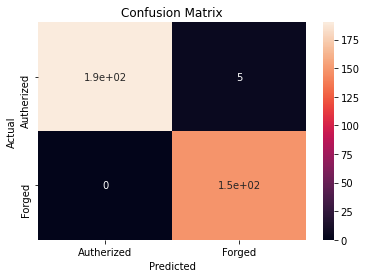

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
labels=["Autherized","Forged"]
cm=confusion_matrix(actual_value,predicted_value,labels)
ax=plt.subplot()
sns.heatmap(cm,annot=True,ax=ax)
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix")
ax.xaxis.set_ticklabels(labels);
ax.yaxis.set_ticklabels(labels)

In [17]:
tn,tp,fp,fn=confusion_matrix(Y_test,prediction).ravel()
print(tn)
print(tp)

190
5


In [18]:
accuracy=190+5/190+5+0+5
print(accuracy)

200.02631578947367
